In [67]:
# Librerías.
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
# Cargamos datos.
data = pd.read_excel('/content/penalti_stats.xlsx')
data_no_convocados = pd.read_excel('/content/penalti_stats_no_convocados.xlsx')

In [46]:
# Columnas del fichero excel.
data.columns

Index(['Pos', 'Dorsal', 'Nombre', 'Equipo', 'Penaltis', 'Fallados',
       'Acertados', '% acierto'],
      dtype='object')

In [47]:
# Convertimos a data frame
data_df=pd.DataFrame(data)
data_df

,Pos,Dorsal,Nombre,Equipo,Penaltis,Fallados,Acertados,% acierto
0,Portero,1,David Raya,Arsenal,0,0,0,0.000000
1,Centrocampista,6,Mikel Merino,Arsenal,1,1,0,0.000000
2,Portero,23,Unai Simón,Athletic Club,0,0,0,0.000000
3,Defensa,5,Daniel Vivian,Athletic Club,2,1,1,0.500000
4,Centrocampista,11,Nico Williams,Athletic Club,2,0,2,1.000000
5,Defensa,3,Robin Le Normand,Atlético Madrid,0,0,0,0.000000
6,Centrocampista,22,Isco,Betis,11,1,10,0.909091
7,Defensa,14,Oscar Mingueza,Celta de Vigo,0,0,0,0.000000
8,Defensa,24,Marc Cucurella,Chelsea,0,0,0,0.000000
9,Defensa,4,Pau Cubarsí,F.C Barcelona,0,0,0,0.000000


In [48]:
# Obtener dataframe con datos de los jugadores lanzadores de penaltis contra Portugal.
nombres = ['Mikel Merino', 'Álex Baena', 'Isco', 'Álvaro Morata']
lanzadores_partido = data_df[data_df['Nombre'].isin(nombres)]
lanzadores_partido



,Pos,Dorsal,Nombre,Equipo,Penaltis,Fallados,Acertados,% acierto
1,Centrocampista,6,Mikel Merino,Arsenal,1,1,0,0.000000
6,Centrocampista,22,Isco,Betis,11,1,10,0.909091
15,Delantero,7,Álvaro Morata,Galatasaray,2,0,2,1.000000
24,Centrocampista,16,Álex Baena,Villareal,2,2,0,0.000000


In [49]:
# Vamos a obtener los 10 mejores lanzadores de penaltis de la selección española.
media_penaltis_acierto = data_df['% acierto'].mean() # Media = 0.357517
media_penaltis_acierto
top_ten_lanzadores=data_df[data_df['% acierto']>=media_penaltis_acierto].sort_values(by='% acierto',ascending=False)
top_ten_lanzadores['% acierto'] = round(top_ten_lanzadores['% acierto'] * 100,2)
top_ten_lanzadores.head(10)
# Seleccionar los 10 primeros y exportar a Excel
top_ten_lanzadores.head(10).to_excel('top_10_lanzadores_penaltis.xlsx', index=False)

In [50]:
# Obtener 10 mejores lanzadores penaltis de la selección, y que hayan lanzado más penaltis que la media.
media_penaltis_lanzados = round(data_df['Penaltis'].mean(),0) # Media = 3.0
media_penaltis_lanzados
top_ten_lanzadores_nuevo=data_df[(data_df['Penaltis']>=media_penaltis_lanzados) & (data_df['% acierto']>=media_penaltis_acierto)].sort_values(by='Penaltis',ascending=False)
top_ten_lanzadores_nuevo['% acierto'] = round(top_ten_lanzadores_nuevo['% acierto'] * 100,2)
top_ten_lanzadores_nuevo.head(10).to_excel('top_10_lanzadores_penaltis_nuevo.xlsx', index=False)

In [51]:
# Vamos a obtener los datos de los no convocados y analizamos.
# 1. Crear DataFrame y filtrar jugadores no convocados con mejor rendimiento
data_no_convocados_df = pd.DataFrame(data_no_convocados)
top_no_convocados = data_no_convocados_df[
    (data_no_convocados_df['Penaltis'] >= media_penaltis_lanzados) &
    (data_no_convocados_df['% acierto'] >= media_penaltis_acierto)
].sort_values(by='Penaltis', ascending=False)

# 2. Convertir '% acierto' a porcentaje (×100) y redondear a 2 decimales
top_no_convocados['% acierto'] = (top_no_convocados['% acierto'] * 100).round(2)

# 3. Exportar a Excel (sin incluir el índice)
top_no_convocados.to_excel('mejores_no_convocados_penaltis.xlsx', index=False)


In [55]:
# Juntamos dataFrames en uno solo y analizamos.
jugadores_seleccionados = pd.concat([top_no_convocados,top_ten_lanzadores_nuevo])
jugadores_seleccionados.head()
# 4. Exportar a Excel (sin índice)
jugadores_seleccionados.to_excel('jugadores_seleccionados_penaltis.xlsx', index=False)

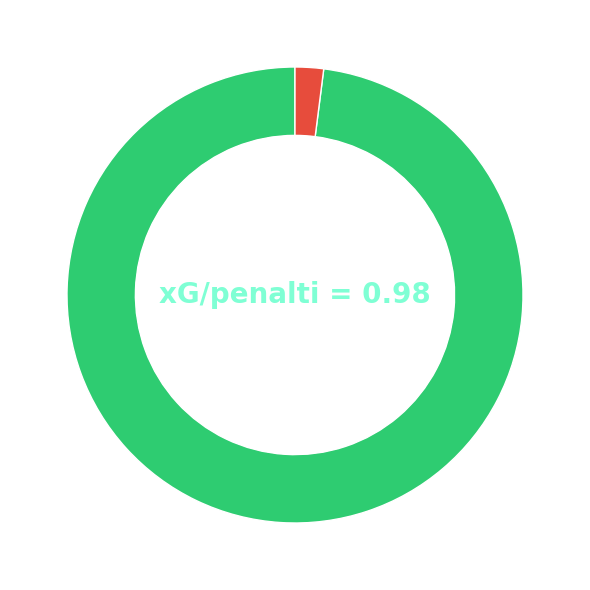

In [113]:
# Generar gráfico para ver el xg/penalti.
lanzadores_oficiales=jugadores_seleccionados.head(5)
lanzadores_oficiales['xg/penalti'] = 1-(lanzadores_oficiales['% acierto']/100)/lanzadores_oficiales['Penaltis']


# 1. Filtrar datos de Iago Aspas
aspas_data = lanzadores_oficiales[lanzadores_oficiales['Nombre'] == 'Mikel Oyarzabal']
xg_penalti = aspas_data['xg/penalti'].values[0]  # Valor xG/penalti

# 2. Configurar gráfico de anillo
fig, ax = plt.subplots(figsize=(8, 6))
size = 0.3  # Grosor del anillo
colors = ['#2ecc71', '#e74c3c']  # Verde (éxito) y rojo (fallo)

# 3. Crear el anillo SIN porcentajes
wedges = ax.pie(
    [xg_penalti, 1 - xg_penalti],
    colors=colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    startangle=90,
    autopct=None,  # Desactiva los porcentajes automáticos
    pctdistance=0.8
)

# 4. Añadir texto central con el valor xG
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
ax.text(
    0, 0,
    f"xG/penalti = {xg_penalti:.2f}",
    ha='center', va='center',
    fontsize=20,
    color="aquamarine",
    fontweight='bold'
)


plt.tight_layout()
plt.show()